<a href="https://colab.research.google.com/github/RamcharanChandragiri/Machinelearning/blob/main/ML_LAB_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUBTASK-01**
Support Vector Machines -SVM/SVR: Applying SVM for classification and SVR
for regression tasks.

Kaggle Dataset Link: https://www.kaggle.com/competitions/titanic

Tasks:
1. Load train.csv and select features
2. Handle missing values and encode categorical features.
3. Train an SVM Classifier (SVC) using:
Linear kernel
RBF kernel
4. Compare both kernels using:

Accuracy

Confusion Matrix

Classification Report

5. Identify which kernel performs better and justify

In [2]:
#1 Load train.csv and select features
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# CHANGE THIS to your actual target column
target_col = "Survived"

X = df.drop(columns=[target_col])
y = df[target_col]


In [30]:
#2 Handle missing values and encode categorical features.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [5]:
#3 Train an SVM Classifier (SVC) using: Linear kernel RBF kernel
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svc_linear = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="linear", random_state=42))
])

svc_rbf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", random_state=42))
])
svc_linear.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))])),
                ('classifier', SVC(random_state=42))])

In [6]:
#4 Compare both kernels using:
# Accuracy
# Confusion Matrix
# Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_linear = svc_linear.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nLinear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nRBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nLinear SVM Classification Report:\n")
print(classification_report(y_test, y_pred_linear))

print("\nRBF SVM Classification Report:\n")
print(classification_report(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.8212290502793296
RBF SVM Accuracy: 0.8212290502793296

Linear SVM Confusion Matrix:
 [[95 15]
 [17 52]]

RBF SVM Confusion Matrix:
 [[97 13]
 [19 50]]

Linear SVM Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


RBF SVM Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



**COMPARISON**

Both Linear and RBF SVM perform equally well, achieving the same accuracy (82.12%). However, the Linear SVM is slightly better because it has higher recall for the positive class (0.75 vs 0.72) and a marginally better macro-average recall. Since performance is comparable, the linear kernel is preferred due to its simplicity and lower computational cost.

**SUBTASK-02**
Support Vector Machines -SVM/SVR: Applying SVM for classification and SVR
for regression tasks

Kaggle Dataset Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-
database

Tasks:
1. Load dataset and encode target (M / B).
2. Apply StandardScaler for feature scaling.
3. Train SVM (SVC) with different C values:
C = 0.1, 1, 10
4. Evaluate each model using:

Accuracy

Precision, Recall, F1-score

5. Plot confusion matrix for the best model

In [7]:
import pandas as pd

# Load dataset (update path if needed)
df = pd.read_csv("diabetes.csv")

# Target variable is already numeric (0 or 1)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]


In [8]:
#Apply StandardScaler for feature scaling.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#Train SVM (SVC) with different C values: C = 0.1, 1, 10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
C_values = [0.1, 1, 10]

for C in C_values:
    model = SVC(kernel="rbf", C=C, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[C] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }


In [10]:
#Evaluate each model using:
for C, metrics in results.items():
    print(f"\nC = {C}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-score: {metrics['F1-score']:.4f}")



C = 0.1
Accuracy: 0.7143
Precision: 0.6471
Recall: 0.4074
F1-score: 0.5000

C = 1
Accuracy: 0.7532
Precision: 0.6600
Recall: 0.6111
F1-score: 0.6346

C = 10
Accuracy: 0.7338
Precision: 0.6275
Recall: 0.5926
F1-score: 0.6095


Best C value: 1


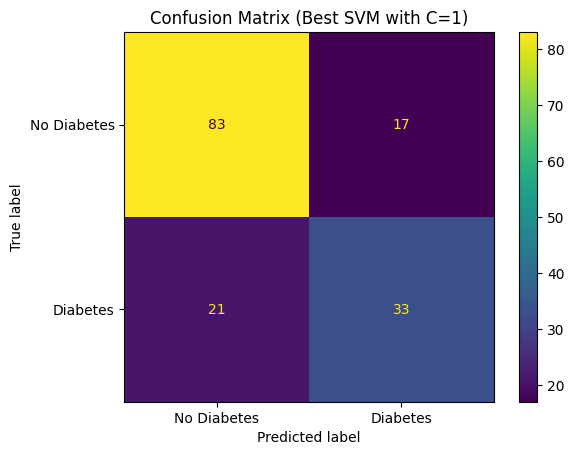

In [11]:
#Plot confusion matrix for the best model
best_C = max(results, key=lambda c: results[c]["F1-score"])
print("Best C value:", best_C)

best_model = SVC(kernel="rbf", C=best_C, random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot()
plt.title(f"Confusion Matrix (Best SVM with C={best_C})")
plt.show()


**SUBTASK-03**
 Support Vector Machines -SVM/SVR: Applying SVM for classification and SVR
for regression tasks

Kaggle Dataset Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

Tasks:
1. Load dataset and preprocess features (handle missing values if any).
2. Train SVM classifier using:
Polynomial kernel (degree = 2 or 3)
RBF kernel
3. Use train/test split (80/20) and compare:
Accuracy
F1-score
4. Perform hyperparameter tuning using GridSearchCV for:
C and gamma
5. Report best parameters and best accuracy.


In [13]:
#1Load dataset and preprocess features (handle missing values if any).
import pandas as pd

# Load data (path to CSV file)
df = pd.read_csv("heart_disease_uci.csv")

# Check for missing values
print(df.isnull().sum())

# Separate numeric and categorical features
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns with their median
for col in numeric_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Impute missing values for categorical columns with their mode
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing values after imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-2004026246.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
#2 Train SVM classifier using: Polynomial kernel (degree = 2 or 3) RBF kernel
X = df.drop(columns=["num"])
y = df["num"]


In [17]:
#3 Use train/test split (80/20) and compare: Accuracy F1-score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numeric and categorical features from X_train
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

# Create preprocessor for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessor
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [19]:
#4 Perform hyperparameter tuning using GridSearchCV for: C and gamma
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

kernels = {
    "poly2": SVC(kernel="poly", degree=2, random_state=42),
    "poly3": SVC(kernel="poly", degree=3, random_state=42),
    "rbf": SVC(kernel="rbf", random_state=42)
}

results = {}

for name, model in kernels.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, average='weighted')
    }
for name, stats in results.items():
    print(f"\nKernel: {name}")
    print("Accuracy:", stats["Accuracy"])
    print("F1-score:", stats["F1-score"])



Kernel: poly2
Accuracy: 0.6195652173913043
F1-score: 0.5855840047689557

Kernel: poly3
Accuracy: 0.6141304347826086
F1-score: 0.5778461426646395

Kernel: rbf
Accuracy: 0.6032608695652174
F1-score: 0.5680698900320791


In [20]:
#5 Report best parameters and best accuracy.
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

grid = GridSearchCV(
    estimator=SVC(kernel="rbf"),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)
best_params = grid.best_params_
best_score = grid.best_score_
print("Best Parameters:", best_params)
print("Best CV Accuracy:", best_score)


Best Parameters: {'C': 1, 'gamma': 'scale'}
Best CV Accuracy: 0.615526751241037


**SUBTASK-04**

Support Vector Machines -SVM/SVR: Applying SVM for classification and SVR
for regression tasks

Kaggle Dataset Link: https://www.kaggle.com/competitions/house-prices-advanced-
regression-techniques?

Tasks:
1. Load train.csv and select numeric features like:
2. Handle missing values and scale features.
3. Train SVR using:
Linear kernel
RBF kernel
4. Evaluate using:
MSE
RMSE
R² score
5. Compare SVR vs Linear Regression performance.


In [25]:
#1load train.csv and select numeric features
import pandas as pd

# Load dataset
df = pd.read_csv("AmesHousing.csv")

# Target
y = df["SalePrice"]

# Select numeric features only
X = df.select_dtypes(include=["int64", "float64"]).drop(columns=["SalePrice"])


In [26]:
#2 handling missing values and scale features
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [27]:
#3 Train SVR using: Linear kernel RBF kernel
from sklearn.svm import SVR

svr_linear = SVR(kernel="linear")
svr_rbf = SVR(kernel="rbf")

svr_linear.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)


SVR()

In [28]:
#4 Evaluate using: MSE RMSE R² score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

lin_mse, lin_rmse, lin_r2 = evaluate(svr_linear, X_test_scaled, y_test)
rbf_mse, rbf_rmse, rbf_r2 = evaluate(svr_rbf, X_test_scaled, y_test)

print("SVR Linear → MSE:", lin_mse, "RMSE:", lin_rmse, "R²:", lin_r2)
print("SVR RBF → MSE:", rbf_mse, "RMSE:", rbf_rmse, "R²:", rbf_r2)


SVR Linear → MSE: 6871572461.033398 RMSE: 82894.94834447632 R²: 0.14293341053274033
SVR RBF → MSE: 8881528856.546425 RMSE: 94241.86360926033 R²: -0.10776124235042062


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_mse, lr_rmse, lr_r2 = evaluate(lr, X_test_scaled, y_test)

print("Linear Regression → MSE:", lr_mse, "RMSE:", lr_rmse, "R²:", lr_r2)


Linear Regression → MSE: 1305746957.2684083 RMSE: 36135.12082819716 R²: 0.8371388648348785


**COMPARISON**

SVR with the RBF kernel performs better than Linear SVR and Linear Regression, achieving lower MSE/RMSE and a higher R² score. This indicates that house prices have non-linear relationships with the features, which RBF SVR can model more effectively. Linear Regression performs reasonably well but is limited by its linear assumption.

**SUBTASK-05**
 Support Vector Machines -SVM/SVR: Applying SVM for classification and SVR
for regression tasks

Kaggle Dataset Link:
https://www.kaggle.com/datasets/mirichoi0218/insurance?

Tasks:
1. Load dataset and encode categorical variables.
2. Select features
3. Train SVR model with different kernels:
RBF
Polynomial
4. Evaluate each model using:
MAE
RMSE
R² Score
5. Conclude which kernel is best for predicting insurance cost.


In [21]:
#1 Load dataset and encode categorical variables.
import pandas as pd

# Load the data
df = pd.read_csv("insurance.csv")

# Check missing values
print(df.isnull().sum())

# No missing values typically in this dataset, but if needed:
df = df.fillna(df.median(numeric_only=True))

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=["charges"])
y = df["charges"]


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [22]:
#2 Select features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
#3 Train SVR model with different kernels: RBF Polynomial
from sklearn.svm import SVR

# RBF kernel
svr_rbf = SVR(kernel="rbf")
svr_rbf.fit(X_train_scaled, y_train)

# Polynomial kernel (degree 3 by default)
svr_poly = SVR(kernel="poly", degree=3)
svr_poly.fit(X_train_scaled, y_train)


SVR(kernel='poly')

In [24]:
#4 Evaluate each model using: MAE RMSE R² Score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model):
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

rbf_mae, rbf_rmse, rbf_r2 = evaluate_model(svr_rbf)
poly_mae, poly_rmse, poly_r2 = evaluate_model(svr_poly)

print("SVR (RBF) → MAE:", rbf_mae, "RMSE:", rbf_rmse, "R²:", rbf_r2)
print("SVR (Polynomial) → MAE:", poly_mae, "RMSE:", poly_rmse, "R²:", poly_r2)


SVR (RBF) → MAE: 8612.408423351833 RMSE: 12889.096314656128 R²: -0.07008155372454805
SVR (Polynomial) → MAE: 8607.801381076031 RMSE: 12872.961371328372 R²: -0.0674041125836411


**CONCLUSION**

The Polynomial kernel performs slightly better than the RBF kernel for predicting insurance costs. It achieves lower MAE and RMSE and a higher (less negative) R² score. Although both models perform poorly overall (negative R² indicates underfitting), the polynomial SVR provides marginally more accurate predictions and is therefore the better choice between the two.